# Numerical Integration of Exponential growth

***

# The Forward Euler Method

Developing simple ways to solve ordinary differential equations has long been an area of intense research. While deriving the analytical solution may be simple in some cases, it is often useful to solve them numerically, especially if slamming out the analytical solution will give you carpal tunnel.

While there are many ways to numerically integrate these equations, in this tutorial we will examine the Forward Euler method. Say we have an ordinary differential equation such as

$$\frac{dN}{dt} = r N(t) \tag{1}$$

as would be the case for exponential growth, where $r$ is some growth-rate constant and  $t$  is time. Rather than solving this analytically (although it is trivial), we can solve it numerically by starting at some given value of $N$, evaluating Equation (1) for a given time step $\Delta t$, and updating the new value of $N$ at this new time $t+ \Delta t$. We can phrase this mathematically as

$$N(t+ \Delta t) = N(t) + rN(t) \Delta t .\tag{2}$$

Say our initial value ($N$ at $t=0$) is  $N=10$  and $r=1$. We can take a time step $\Delta t=0.1$ and find that the change in value of $N$ is

$$\Delta N = rN\Delta t = 1. \tag{3}$$

We can then compute the new value of $N$ at time $t+\Delta t$ as

$$N(t+\Delta t) = N(t) + \Delta N = 10 + 1 = 11.\tag{4}$$

We can then take another step forward in time and repeat the process for as long as we would like. As the total time we'd like to integrate over becomes large, it becomes obvious why using a computer is a far more attractive approach than scribbling it by hand.

A major point to be wary of is the instability of this method. The error in this scales with the square of our step size. We must choose a sufficiently small step in time such that at most only one computable event must occur. For example, if we are integrating exponential growth of bacterial cells, we don't want to take time steps larger than a cell division! This requirement is known as the Courant-Friedrichs-Lewy condition and is important for many different time-marching computer simulations.

As is often the case, the best way to learn is to do. Let's give our digits some exercise and numerically integrate this exponential growth differential equation. 

In [65]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

In [66]:
# Init number of cells
N_0 = 1

In [67]:
# Double time
t_d = 0.5 # hours

In [68]:
# Growth rate
r = np.log(2)/t_d

In [69]:
# Total integration time 
T_total = 5

In [70]:
# Time intervals
delta_t = .01  # hours

In [71]:
# number of steps 
num_steps = int(T_total / delta_t) + 1

In [72]:
# Initialize array for cell count
N_t = np.zeros(num_steps)
N_t[0] = N_0

In [73]:
for t in range(1, num_steps):
  # number of new cells
  dN = r * delta_t * N_t[t-1]

  # Update cell count
  N_t[t] = N_t[t-1] + dN
  

In [78]:
# N_t

In [79]:
# Define xticks
times = np.arange(num_steps) * delta_t
# times

In [76]:
solution = N_0 * np.exp(r*times)

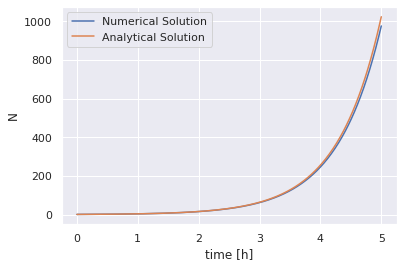

In [77]:
plt.plot(times, N_t, label="Numerical Solution")
plt.plot(times, solution, label="Analytical Solution")

plt.legend()
plt.xlabel("time [h]")
plt.ylabel("N");